# Regularization of linear regression model

Neste caderno, veremos as limita√ß√µes dos modelos de regress√£o linear e
a vantagem de usar modelos regularizados.

Al√©m disso, tamb√©m apresentaremos o pr√©-processamento necess√°rio ao lidar com
com modelos regularizados, al√©m disso quando o par√¢metro de regulariza√ß√£o
precisa ser ajustado.

Come√ßaremos destacando o problema de ajuste excessivo que pode surgir com
um modelo de regress√£o linear simples.

## Efeito da regulariza√ß√£o

Carregaremos primeiro o conjunto de dados de habita√ß√£o da Calif√≥rnia.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se voc√™ quiser uma vis√£o geral mais detalhada sobre este conjunto de dados, pode consultar o
Ap√™ndice - se√ß√£o de descri√ß√£o dos conjuntos de dados no final deste MOOC. </p>
</div>

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

Em um dos notebooks anteriores, mostramos que modelos lineares podem ser usados
mesmo em configura√ß√µes onde `data` e` target` n√£o est√£o linearmente vinculados.

Mostramos que √© poss√≠vel usar o transformador `PolynomialFeatures` para criar
recursos adicionais que codificam intera√ß√µes n√£o lineares entre recursos.

Aqui, usaremos este transformador para aumentar o espa√ßo de recursos.
Posteriormente, treinaremos um modelo de regress√£o linear. N√≥s vamos usar o
conjunto de teste fora da amostra para avaliar as capacidades de generaliza√ß√£o de nosso
modelo.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(PolynomialFeatures(degree=2),
                                  LinearRegression())
cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

Podemos comparar o erro quadr√°tico m√©dio no conjunto de treinamento e teste com
avaliar o desempenho de generaliza√ß√£o do nosso modelo.

In [3]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regresion model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regresion model on the train set:
4190.212 +/- 151.123


In [4]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regresion model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regresion model on the test set:
13334.943 +/- 20292.681


A pontua√ß√£o no conjunto de treinamento √© muito melhor. Este desempenho estat√≠stico
lacuna entre a pontua√ß√£o de treinamento e teste √© uma indica√ß√£o de que nosso modelo
sobrecarregou nosso conjunto de treinamento.

Na verdade, este √© um dos perigos ao aumentar o n√∫mero de recursos
com um transformador `PolynomialFeatures`. Nosso modelo se concentrar√° em alguns
caracter√≠sticas espec√≠ficas. Podemos verificar os pesos do modelo para ter um
confirma√ß√£o. Vamos criar um dataframe: as colunas ir√£o conter o nome
do recurso, enquanto a linha os valores dos coeficientes armazenados por cada modelo
durante a valida√ß√£o cruzada.

Como usamos `PolynomialFeatures` para aumentar os dados, vamos criar
nomes de recursos representativos da combina√ß√£o de recursos. Scikit-learn
fornece um m√©todo `get_feature_names` para este prop√≥sito. Primeiro, vamos pegar
o primeiro modelo ajustado da valida√ß√£o cruzada.

In [5]:
model_first_fold = cv_results["estimator"][0]

Agora, podemos acessar os `PolynomialFeatures` ajustados para gerar o recurso
nomes

In [6]:
feature_names = model_first_fold[0].get_feature_names(
    input_features=data.columns)
feature_names

['1',
 'MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedInc^2',
 'MedInc HouseAge',
 'MedInc AveRooms',
 'MedInc AveBedrms',
 'MedInc Population',
 'MedInc AveOccup',
 'MedInc Latitude',
 'MedInc Longitude',
 'HouseAge^2',
 'HouseAge AveRooms',
 'HouseAge AveBedrms',
 'HouseAge Population',
 'HouseAge AveOccup',
 'HouseAge Latitude',
 'HouseAge Longitude',
 'AveRooms^2',
 'AveRooms AveBedrms',
 'AveRooms Population',
 'AveRooms AveOccup',
 'AveRooms Latitude',
 'AveRooms Longitude',
 'AveBedrms^2',
 'AveBedrms Population',
 'AveBedrms AveOccup',
 'AveBedrms Latitude',
 'AveBedrms Longitude',
 'Population^2',
 'Population AveOccup',
 'Population Latitude',
 'Population Longitude',
 'AveOccup^2',
 'AveOccup Latitude',
 'AveOccup Longitude',
 'Latitude^2',
 'Latitude Longitude',
 'Longitude^2']

Finalmente, podemos criar o dataframe contendo todas as informa√ß√µes.

In [7]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

Agora, vamos usar um gr√°fico de caixa para ver as varia√ß√µes dos coeficientes.

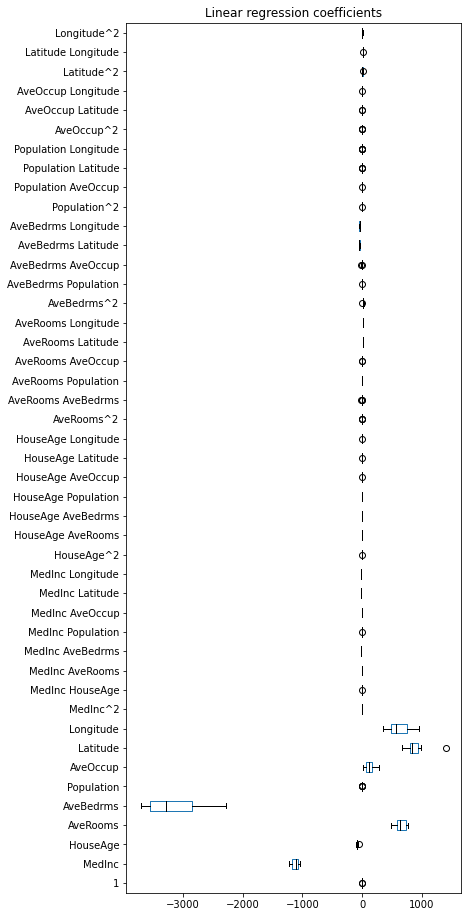

In [8]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

Podemos for√ßar o modelo de regress√£o linear a considerar todos os recursos em mais
forma homog√™nea. Na verdade, poder√≠amos for√ßar um grande peso positivo ou negativo
encolher at√© zero. Isso √© conhecido como regulariza√ß√£o. Vamos usar um cume
modelo que imp√µe tal comportamento.

In [9]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

C:\Users\Rogerio Lopes\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.672e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rogerio Lopes\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rogerio Lopes\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rogerio Lopes\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67367e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rogerio Lopes\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.

In [10]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regresion model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regresion model on the train set:
4373.180 +/- 153.942


In [11]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regresion model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regresion model on the test set:
7303.589 +/- 4950.732


Vemos que as pontua√ß√µes de treinamento e teste est√£o muito mais pr√≥ximas, indicando que
nosso modelo √© menos overfitting. Podemos comparar os valores dos pesos de
cume com a regress√£o linear n√£o regularizada.

In [12]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

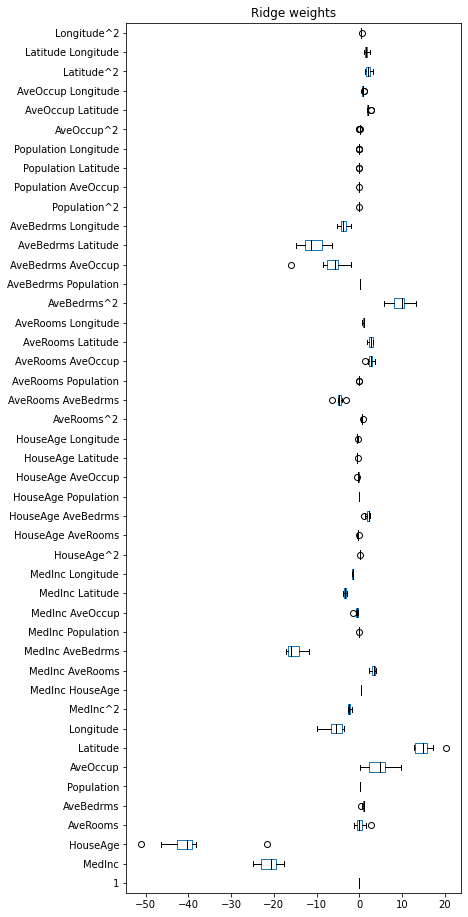

In [13]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

Ao comparar a magnitude dos pesos neste gr√°fico em compara√ß√£o com o
gr√°fico anterior, vemos que a magnitude dos pesos √© reduzida para
zero em compara√ß√£o com o modelo de regress√£o linear.

No entanto, neste exemplo, omitimos dois aspectos importantes: (i) a necessidade de
dimensionar os dados e (ii) a necessidade de buscar a melhor regulariza√ß√£o
par√¢metro.

## Dimensione seus dados!

A regulariza√ß√£o adicionar√° restri√ß√µes aos pesos do modelo. N√≥s vimos no
exemplo anterior de que um modelo de crista far√° com que todos os pesos tenham um
magnitude semelhante. Na verdade, quanto maior o alfa, maior √© a aplica√ß√£o
vai ser.

Este procedimento deve nos fazer pensar sobre o reescalonamento de recursos. Vamos considerar
o caso em que os recursos t√™m uma dispers√£o de dados id√™ntica: se dois recursos
s√£o considerados igualmente importantes pelo modelo, eles ser√£o afetados de forma semelhante por
for√ßa de regulariza√ß√£o.

Agora, vamos considerar o cen√°rio em que os recursos t√™m diferentes
dispers√£o de dados (por exemplo, idade em anos e receita anual em d√≥lares).
Se dois recursos forem t√£o importantes, nosso modelo aumentar√° os pesos de
recursos com pequena dispers√£o e reduzem os pesos dos recursos com
alta dispers√£o.

Lembramos que a regulariza√ß√£o for√ßa a aproxima√ß√£o dos pesos. Portanto, n√≥s temos
uma intui√ß√£o de que se quisermos usar regulariza√ß√£o, lidar com reescalonamento
dados tornariam mais f√°cil encontrar um par√¢metro de regulariza√ß√£o ideal e
portanto, um modelo adequado.

Como uma observa√ß√£o lateral, alguns solucionadores com base na computa√ß√£o de gradiente est√£o esperando tal
dados redimensionados. Dados n√£o escalonados ser√£o prejudiciais ao calcular o √≥timo
pesos. Portanto, ao trabalhar com um modelo linear e dados num√©ricos,
geralmente √© uma boa pr√°tica dimensionar os dados.

Assim, adicionaremos um `StandardScaler` no pipeline de aprendizado de m√°quina. Esse
scaler ser√° colocado antes do regressor.

In [14]:
from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=0.5))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [15]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regresion model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regresion model on the train set:
4347.036 +/- 156.666


In [16]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regresion model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regresion model on the test set:
5508.472 +/- 1816.642


Observamos que os dados de escala t√™m um impacto positivo na pontua√ß√£o do teste e que
a pontua√ß√£o do teste est√° mais pr√≥xima da pontua√ß√£o do trem. Isso significa que nosso modelo √© menos
overfitted e que estamos nos aproximando da melhor generaliza√ß√£o doce
ver.

Vamos dar uma olhada adicional nos diferentes pesos.

In [17]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

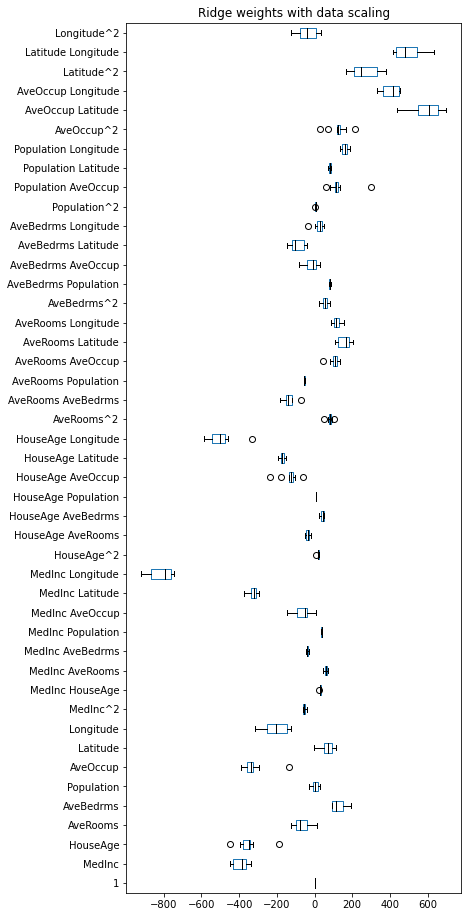

In [18]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

Compare com os gr√°ficos anteriores, vemos que agora todas as manitudes de peso s√£o
mais perto e que todos os pesos est√£o contribuindo mais igualmente.

Na an√°lise anterior, n√£o estudamos se o par√¢metro `alpha` ter√°
um efeito no desempenho. Escolhemos o par√¢metro de antem√£o e o corrigimos
para a an√°lise.

Na pr√≥xima se√ß√£o, verificaremos o impacto desse hiperpar√¢metro e como
deve ser ajustado.

## Ajustando o par√¢metro de regulariza√ß√£o

Conforme mencionado, o par√¢metro de regulariza√ß√£o precisa ser ajustado em cada conjunto de dados.
O par√¢metro padr√£o n√£o levar√° ao modelo ideal. Portanto, precisamos
para ajustar o par√¢metro `alpha`.

O ajuste do hiperpar√¢metro do modelo deve ser feito com cuidado. Na verdade, n√≥s queremos
encontre um par√¢metro ideal que maximize algumas m√©tricas. Assim, requer ambos
um conjunto de treinamento e um conjunto de teste.

No entanto, este conjunto de teste deve ser diferente do teste fora da amostra
conjunto que usamos para avaliar nosso modelo: se usarmos o mesmo, estamos usando
um `alpha` que foi otimizado para este conjunto de teste e quebra o
regra fora da amostra.

Portanto, devemos incluir a pesquisa do hiperpar√¢metro `alfa` dentro do
valida√ß√£o cruzada. Como vimos em notebooks anteriores, poder√≠amos usar um
grid-search. No entanto, alguns preditores no scikit-learn est√£o dispon√≠veis com
uma pesquisa de hiperpar√¢metros integrada, mais eficiente do que usar uma pesquisa em grade.
O nome desses preditores termina com `CV`. No caso de `Ridge`,
O scikit-learn fornece um regressor `RidgeCV`.

Portanto, podemos usar esse preditor como a √∫ltima etapa do pipeline.
Incluindo o pipeline, uma valida√ß√£o cruzada permite fazer um aninhado
valida√ß√£o cruzada: a valida√ß√£o cruzada interna ir√° procurar o melhor
alfa, enquanto a valida√ß√£o cruzada externa dar√° uma estimativa do
pontua√ß√£o de teste.

In [19]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [20]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=-1)

In [21]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regresion model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regresion model on the train set:
4306.562 +/- 25.918


In [22]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regresion model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regresion model on the test set:
4348.657 +/- 252.921


Ao otimizar `alpha`, vemos que as pontua√ß√µes de treinamento e teste s√£o fechadas.
Isso indica que nosso modelo n√£o √© overfitting.

Ao ajustar o regressor de crista, tamb√©m solicitamos armazenar o erro encontrado
durante a valida√ß√£o cruzada (definindo o par√¢metro `store_cv_values = True`).
Vamos representar graficamente o erro quadr√°tico m√©dio para as diferentes regulariza√ß√µes de `alfas`
for√ßa que tentamos.

In [23]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

0.010000      0.012743      0.016238      0.020691      0.026367  \
0   7587.897141   7059.531216   6579.796667   6161.839629   5813.048345   
1   7079.341771   6696.622046   6329.022308   5987.727181   5681.306000   
2  24857.406605  21448.284772  18293.478416  15481.009011  13067.031991   
3   7504.216958   7125.074257   6754.172985   6400.999897   6072.937965   
4   6999.938808   6598.898743   6215.363499   5861.328579   5546.025773   

       0.033598     0.042813     0.054556     0.069519     0.088587  \
0   5535.350138  5326.646369  5182.950517  5100.749049  5079.212663   
1   5415.171818  5191.880969  5012.209177  4876.780585  4787.974274   
2  11071.457116  9480.437579  8254.431555  7338.963939  6675.026438   
3   5774.941819  5509.955509  5280.027720  5087.960263  4939.271829   
4   5275.377052  5052.349007  4878.140850  4753.964890  4683.117084   

      0.112884     0.143845     0.183298     0.233572     0.297635  \
0  5122.029454  5238.704149  5445.118890  5763.012259  6217.925433   
1  4751.851652  4779.853646  4889.937328  5106.656625  5459.549144   
2  6207.024331  5887.541169  5679.263698  5554.913823  5496.051755   
3  4844.228092  4819.618117  4889.808854  5086.420585  5445.877349   
4  4673.049960  4737.162496  4895.935124  5176.863333  5612.500529   

      0.379269     0.483293     0.615848     0.784760      1.000000  
0  6835.274126  7634.692137  8623.620241  9791.918443  11109.476019  
1  5979.280717  6691.530974  7609.581815  8727.609953  10017.092899  
2  5491.367683  5534.775517  5623.398006  5755.456140   5928.154410  
3  6004.320850  6790.113763  7815.311733  9068.542918  10511.939341  
4  6236.037942  7074.449338  8140.303978  9424.471281  10892.352852

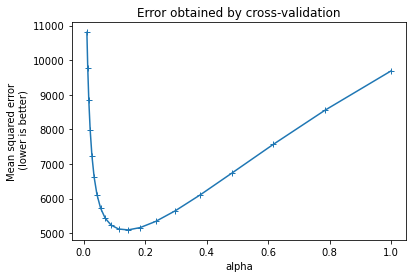

In [24]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

Como podemos ver, a regulariza√ß√£o √© como o sal na cozinha: √© preciso equilibrar
sua quantidade para obter o melhor desempenho estat√≠stico. Podemos verificar se o melhor
`alpha` encontrado √© est√°vel em toda a dobra de valida√ß√£o cruzada.

In [25]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]

Neste notebook, voc√™ aprendeu sobre o conceito de regulariza√ß√£o e
a import√¢ncia do pr√©-processamento e ajuste de par√¢metros.

# üìù Exerc√≠cio M4.04

No notebook anterior, vimos o efeito de aplicar alguma regulariza√ß√£o
no coeficiente de um modelo linear.

Neste exerc√≠cio, estudaremos a vantagem de usar alguma regulariza√ß√£o
ao lidar com recursos correlacionados.

Vamos primeiro criar um conjunto de dados de regress√£o. Este conjunto de dados conter√° 2.000
amostras e 5 recursos dos quais apenas 2 recursos ser√£o informativos.

In [26]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000, n_features=5, n_informative=2, shuffle=False,
    coef=True, random_state=0, noise=30,)

Ao criar o conjunto de dados, `make_regression` retorna o coeficiente verdadeiro
usado para gerar o conjunto de dados. Vamos plotar essas informa√ß√µes.

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

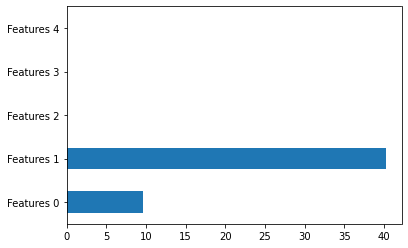

In [27]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Crie um regressor `LinearRegression` e ajuste em todo o conjunto de dados e
verifique o valor dos coeficientes. S√£o os coeficientes do linear
regressor pr√≥ximo aos coeficientes usados para gerar o conjunto de dados?

In [28]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

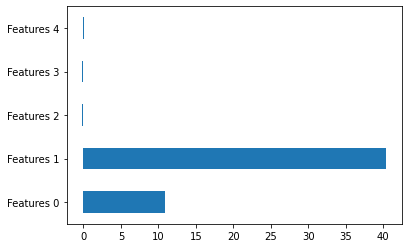

In [29]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

Vemos que os coeficientes est√£o pr√≥ximos aos coeficientes usados para gerar
o conjunto de dados. A dispers√£o √© de fato causada pelo ru√≠do injetado durante o
gera√ß√£o de conjunto de dados.

Agora, crie um novo conjunto de dados que ser√° o mesmo que `dados` com 4 adicionais
colunas que ir√£o repetir duas vezes os recursos 0 e 1. Este procedimento ir√° criar
recursos perfeitamente correlacionados.

In [30]:
# solution
import numpy as np

data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

Ajuste novamente o regressor linear neste novo conjunto de dados e verifique os coeficientes. O que voc√™ observa?

In [31]:
# solution
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([ 1.81165930e+15, -2.11359798e+13, -2.30468750e-01, -2.53906250e-01,
        7.03125000e-02, -9.05829649e+14, -2.86443483e+13, -9.05829649e+14,
        4.97803281e+13])

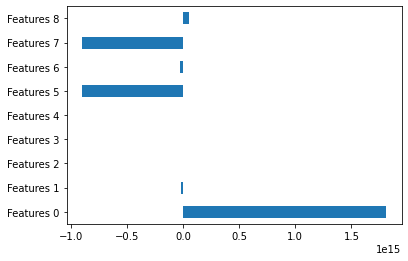

In [32]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

Vemos que os valores dos coeficientes est√£o longe do que se poderia esperar. Ao repetir os recursos informativos, seria de se esperar que esses coeficientes fossem igualmente informativos.

Em vez disso, vemos que alguns coeficientes t√™m uma grande norma ~ 1e14. Na verdade, significa que tentamos resolver um problema matem√°tico mal colocado. Na verdade, encontrar coeficientes em uma regress√£o linear envolve a invers√£o da matriz np.dot (data.T, data), o que n√£o √© poss√≠vel (ou leva a erros num√©ricos elevados).

Crie um regressor de crista e ajuste no mesmo conjunto de dados. Verifique os coeficientes. O que voc√™ observa?

In [33]:
# solution
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

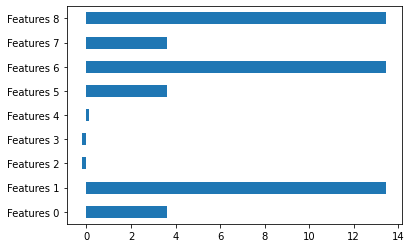

In [34]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

Vemos que a penalidade aplicada aos pesos d√° melhores resultados: os valores dos coeficientes n√£o sofrem de problemas num√©ricos. De fato, a matriz a ser invertida internamente √© np.dot (data.T, data) + alfa * I. Adicionar essa penalidade alfa permite a invers√£o sem problema num√©rico.

Voc√™ pode encontrar a rela√ß√£o entre os coeficientes de crista e os coeficientes originais?

In [35]:
# solution
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])